## Coding Exercise #0404

### 1. Dimensional reduction with PCA:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
%matplotlib inline

#### 1.1. Read in data and explore:

In [13]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [14]:
df.shape

(23, 23)

In [15]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


#### 1.2. Visualize the data:

In [16]:
# Define a suitable visualization function based on imshow().
# Visualizes the whole dataset at once as pixel image.
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()

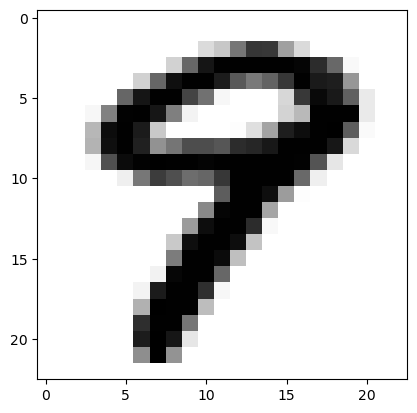

In [17]:
X = np.array(df)
ShowMe(X)

#### 1.3. Visualize the reduced dimensional input by PCA:

In [9]:
# Define a function that returns reduced dimensional input.
def reducedInputPCA(X,nPC):
    pca = PCA(n_components = nPC)                           # Define a PCA object for a given number of target PCs. 
    X_pca = pca.fit_transform(X)                            # Get the transformed scores.
    return pca.inverse_transform(X_pca)                     # Bring back the transformed scores to the original coordinate system.

N# of PCs = 23


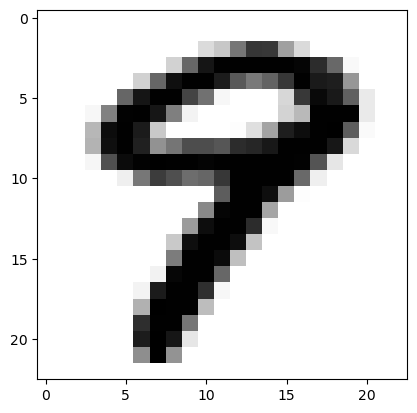

N# of PCs = 10


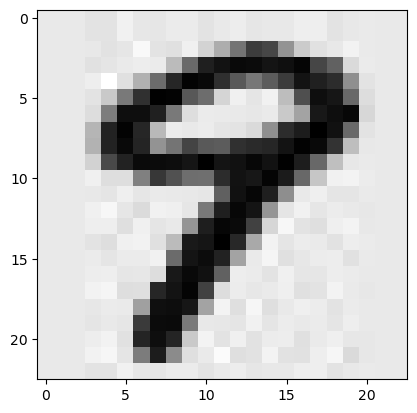

N# of PCs = 5


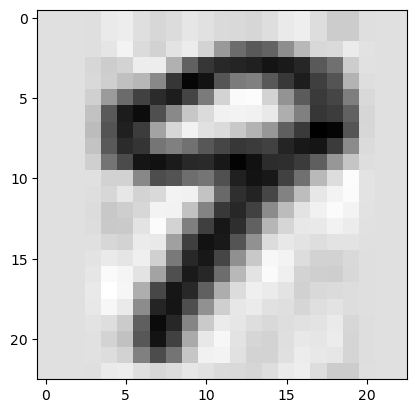

N# of PCs = 3


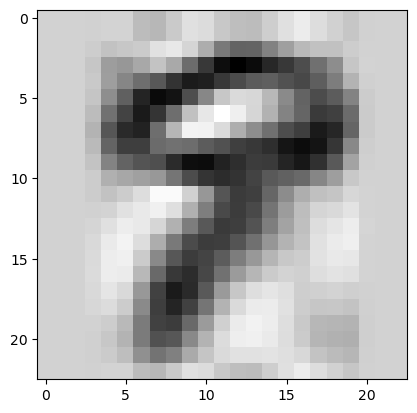

N# of PCs = 1


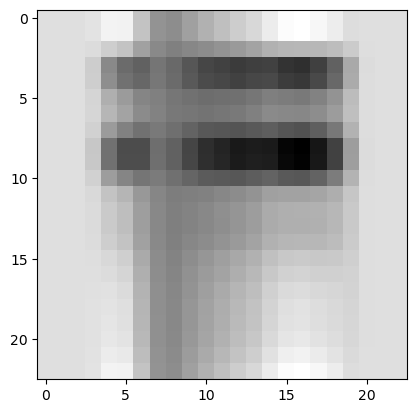

In [10]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

#### 1.4. Analysis of the cumulative variance ratio (CVR):

In [18]:
pca = PCA(n_components = 23)                          # Define a PCA object.
pca.fit(X)                                            # Train with the data.

PCA(n_components=23)

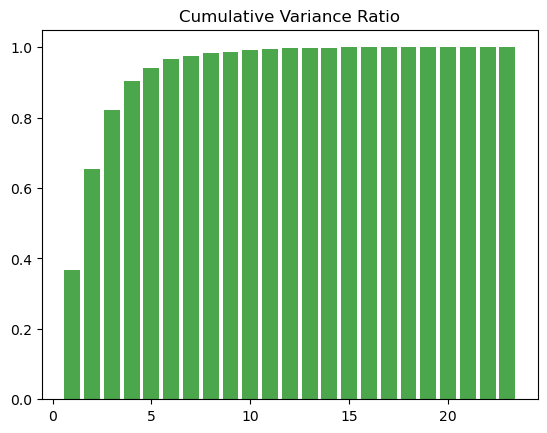

In [19]:
# Visualize the CVRs as a Barplot.
CVRs = np.cumsum(pca.explained_variance_ratio_)        # Calculate the CVRs.
nPCs = np.arange(23)+1                                 # Define an array that corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)  
plt.title('Cumulative Variance Ratio')
plt.show()

### 2. Optimized high dimensional visualiztion with PCA:

#### 2.1. Simulate data:

In [51]:
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=5, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 5)

In [52]:
# Define a custom color palette.
myColors = {0:'red',1:'green',2:'blue'}  
labelColors = pd.Series(label).apply(lambda x: myColors[x])

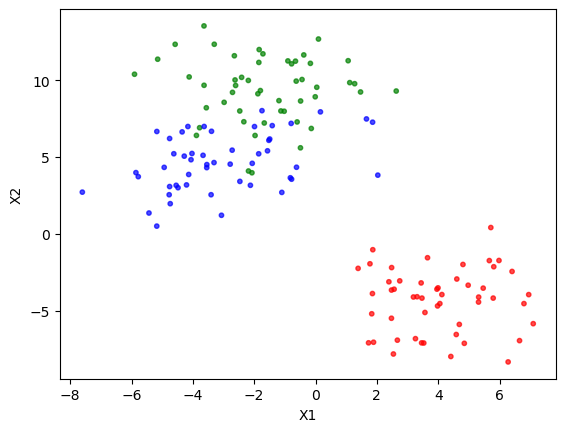

In [53]:
# Visualize on the X1 vs X2 plane. X1 ==> column 0,  X2 ==> column 1.  
# We can hardly tell the clusters apart! 
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

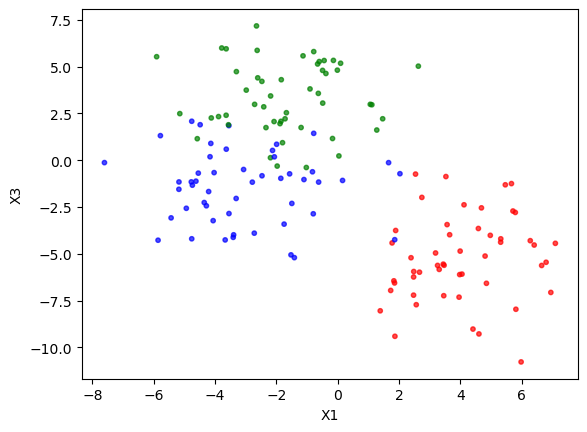

In [54]:
# Visualize on the X1 vs X5 plane. X1 ==> column 0,  X5 ==> column 4.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,2],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X3")
plt.show()

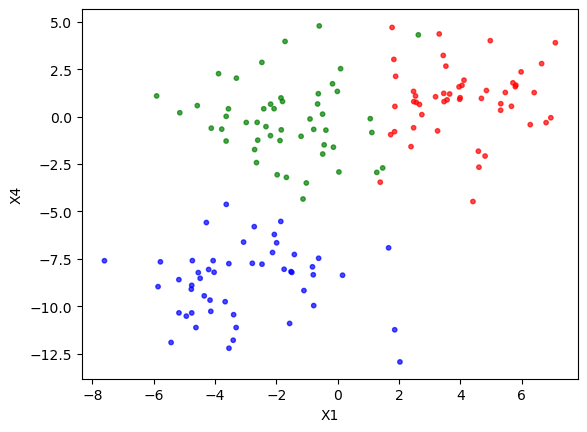

In [55]:
# Visualize on the X5 vs X8 plane. X5 ==> column 4,  X8 ==> column 7.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,3],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X4")
plt.show()

#### 2.2. Visualize on the plane defined by PC1 and PC2:

In [58]:
# Only 2 first PCs are needed. 
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

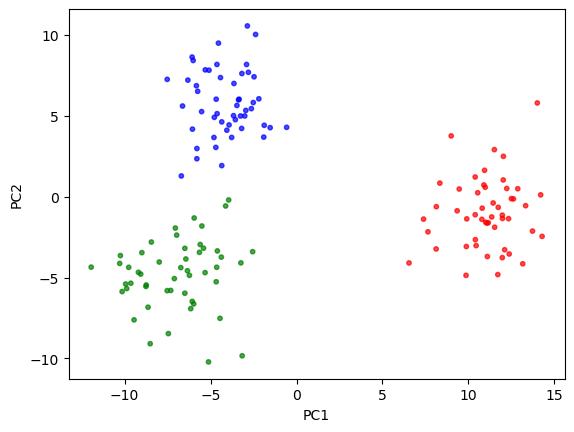

In [59]:
# Visualize on the PC1 vs PC2 plane.
# The clusters overlap the least!
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

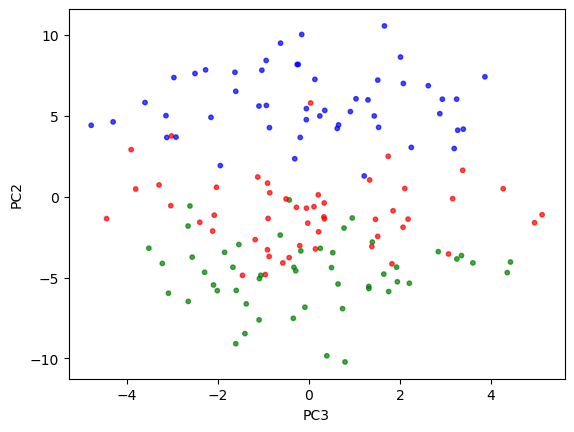

In [63]:
plt.scatter(X_pca[:,2],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.show()